In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df

In [3]:
# Drop ID column
df.drop('ID#', axis=1, inplace=True)

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
             Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
m

<Figure size 1200x600 with 0 Axes>

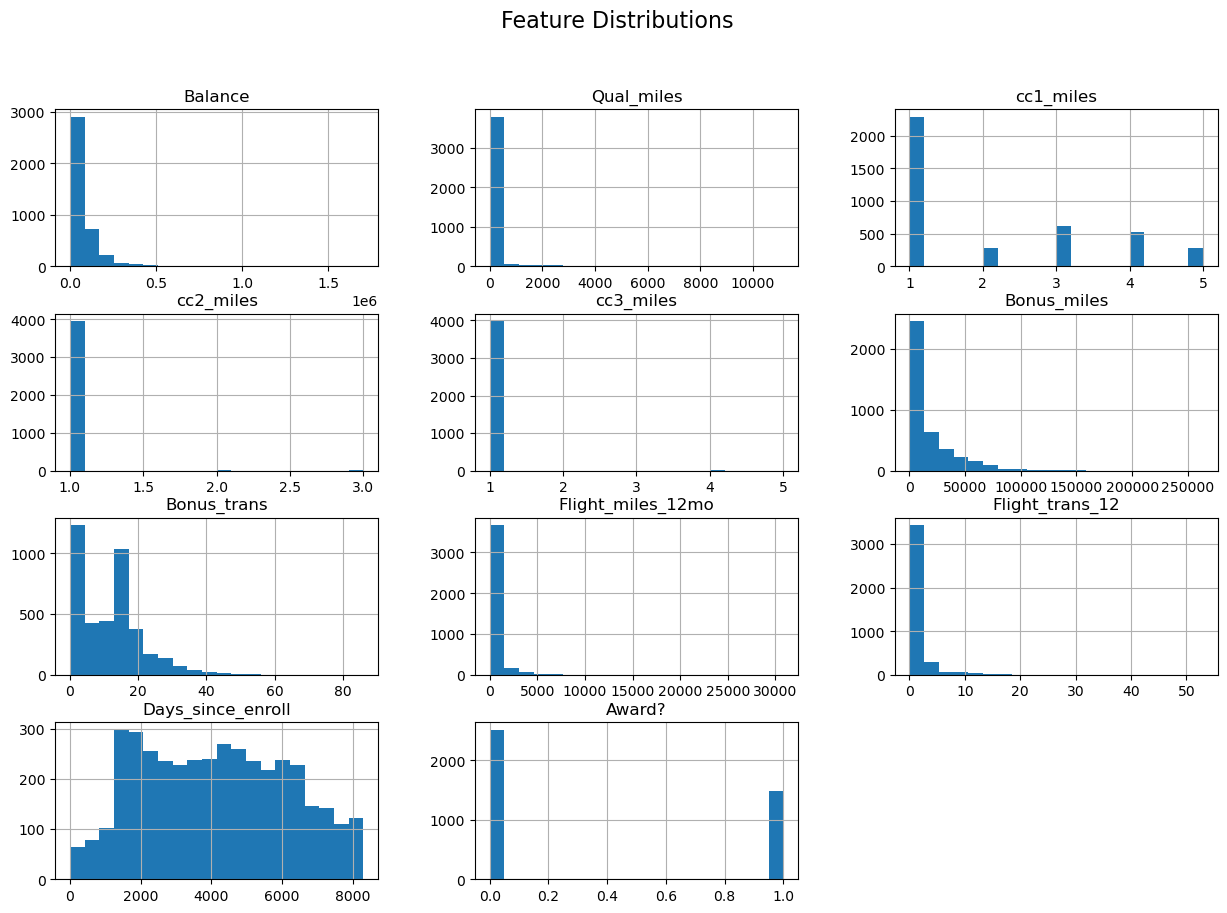

In [6]:
# Visualizations
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

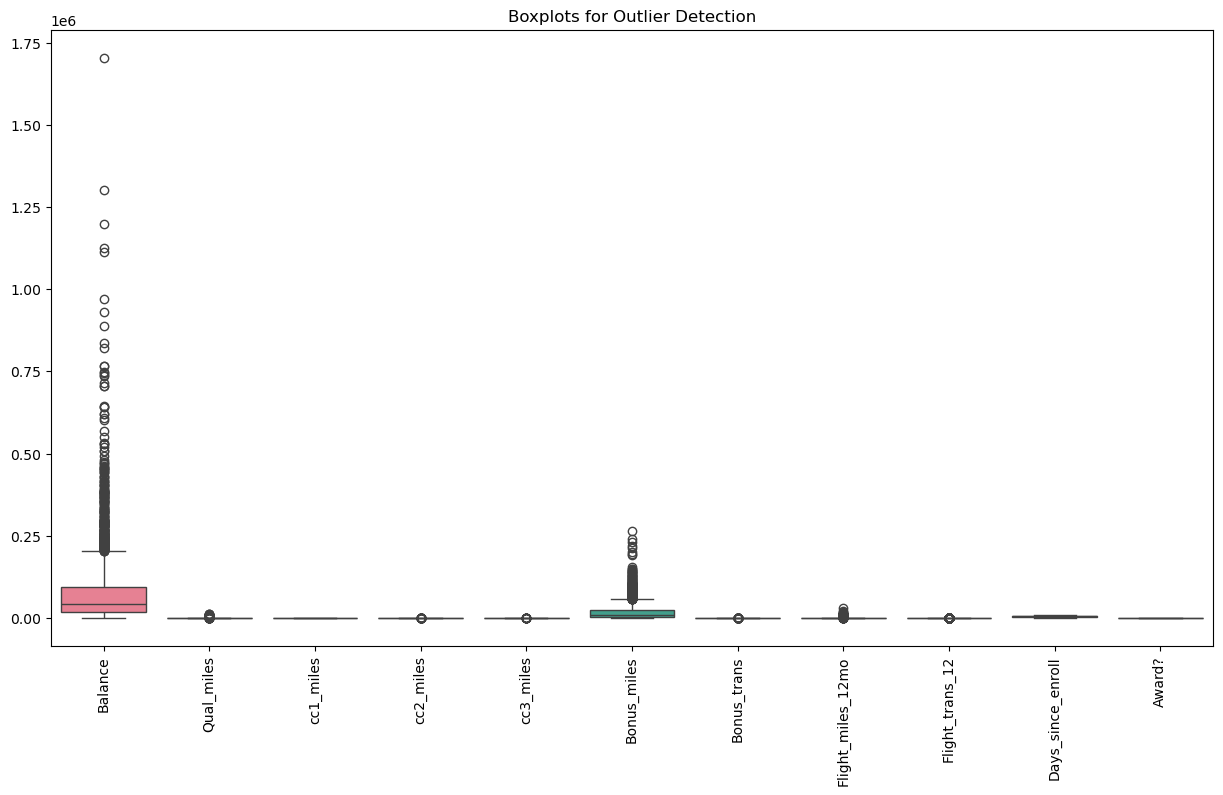

In [7]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots for Outlier Detection")
plt.show()


In [8]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
# ---------------------------- K-MEANS ----------------------------
# Elbow method to determine optimal K
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


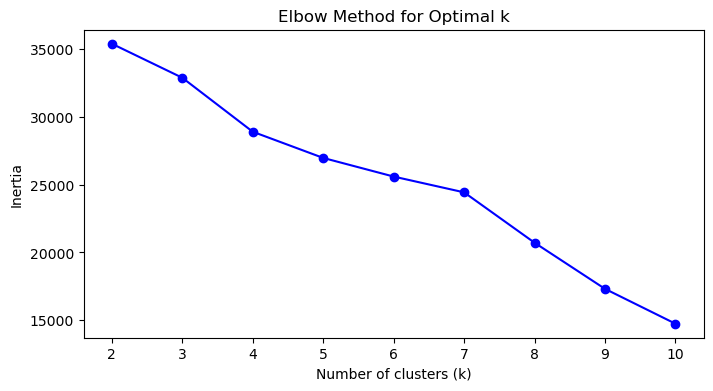

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
# Final KMeans with chosen K (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
k_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Cluster'] = k_labels

In [12]:
# Silhouette Score
k_silhouette = silhouette_score(df_scaled, k_labels)
print(f"KMeans Silhouette Score: {k_silhouette:.4f}")

KMeans Silhouette Score: 0.1907


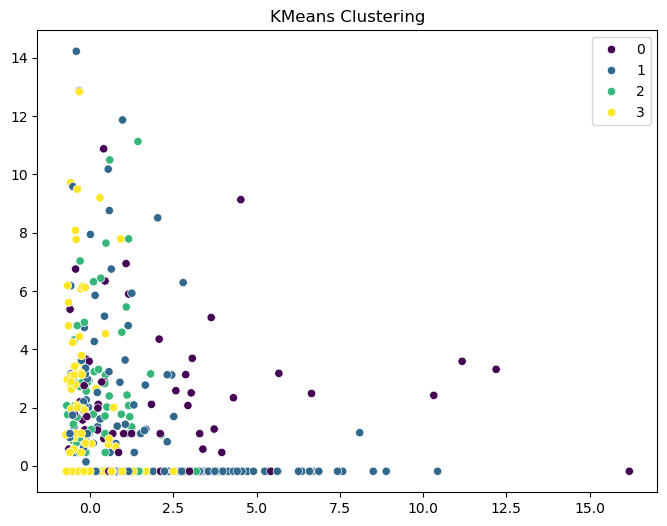

In [13]:
# KMeans Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=k_labels, palette='viridis')
plt.title("KMeans Clustering")
plt.show()

In [14]:
# ---------------------------- HIERARCHICAL CLUSTERING ----------------------------
linkage_matrix = linkage(df_scaled, method='ward')

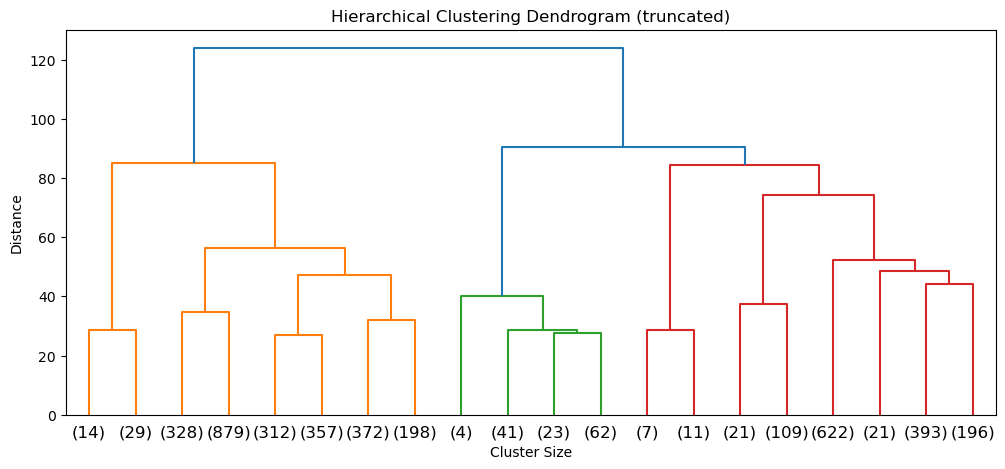

In [15]:
plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [16]:
# Assign clusters (e.g., 4 clusters)
h_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
df['Hierarchical_Cluster'] = h_labels

In [17]:
# ---------------------------- DBSCAN ----------------------------
dbscan = DBSCAN(eps=2.0, min_samples=5)
db_labels = dbscan.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = db_labels

In [18]:
# Silhouette Score for DBSCAN (excluding noise)
db_valid = df_scaled[db_labels != -1]
db_labels_valid = db_labels[db_labels != -1]
db_silhouette = silhouette_score(db_valid, db_labels_valid) if len(set(db_labels_valid)) > 1 else -1
print(f"DBSCAN Silhouette Score: {db_silhouette:.4f}")

DBSCAN Silhouette Score: 0.2805


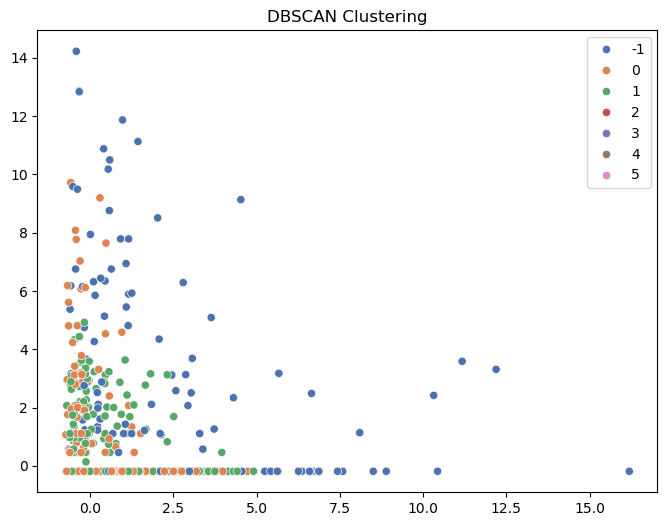

In [19]:
# DBSCAN Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=db_labels, palette='deep')
plt.title("DBSCAN Clustering")
plt.show()


In [20]:
# ---------------------------- Insights ----------------------------
print("\nCluster Insights:")
print(df.groupby('KMeans_Cluster').mean())
print("\nHierarchical Clusters:\n", df['Hierarchical_Cluster'].value_counts())
print("\nDBSCAN Clusters:\n", df['DBSCAN_Cluster'].value_counts())



Cluster Insights:
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               193291.147436  795.455128   2.179487   1.038462   1.000000   
1               122119.899548  151.724887   3.885068   1.002715   1.043439   
2                59693.586570  112.733010   1.372168   1.031553   1.000809   
3                36920.458056   96.690413   1.269640   1.006658   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               32292.288462    27.628205        5530.230769        16.211538   
1               43772.394570    19.398190         366.520362         1.087783   
2                6311.116505     8.456311         258.830097         0.806634   
3                4897.208389     6.790280         167.861518         0.509321   

                Days_sinc